<a href="https://colab.research.google.com/github/Molal/sharing/blob/main/Brownbag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: 
The problem statement is to build a data model to predict retention of an employee within an organization (whether the employee will leave the company or continue with it. The feature variables in the dataset are satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years , Department, salary and the target variable is left. The given problem is a classifiacation problem so I choose supervised clasification algorithms such as logistic regression, decision tree, random forest, naive bayes to build the model to make predictions.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as pt 
import seaborn as sns 

Import the dataset 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/arib168/data/main/HR_comma_sep.csv')
df 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info() #checking structure 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum() #checking missing values in the dataset 

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [11]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [15]:
df.replace({'Department':{'sales':0,'technical':1, 'support':2,'IT':3, 'product_mng':4, 'marketing':5, 'RandD':6,'accounting':7,'hr':8, 'management':9}},inplace = True)
df.replace({'salary':{'low':1 ,'medium':2,'high':3}},inplace = True)

In [16]:
df['salary'].value_counts()

1    7316
2    6446
3    1237
Name: salary, dtype: int64

In [17]:
df['Department'].value_counts()

0    4140
1    2720
2    2229
3    1227
4     902
5     858
6     787
7     767
8     739
9     630
Name: Department, dtype: int64

In [18]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,2
2,0.11,0.88,7,272,4,0,1,0,0,2
3,0.72,0.87,5,223,5,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,1


Exploratory data analysis 

In [19]:
# Load the features to a variable X
# X is created by simply dropping the left column and retaining all others.
X = df.drop('left',axis=1)

# Load the target variable to y

y = df['left']

In [25]:
dept = pd.get_dummies(df['Department'])

In [26]:
df = df.drop('Department',axis=1)
df=pd.concat([df,dept],axis=1)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,0,1,2,3,4,5,6,7,8,9
0,0.38,0.53,2,157,3,0,1,0,1,1,0,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,2,1,0,0,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,1,0,2,1,0,0,0,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,0,1,0,0,0,0,0,0,0
14995,0.37,0.48,2,160,3,0,1,0,1,0,0,1,0,0,0,0,0,0,0
14996,0.37,0.53,2,143,3,0,1,0,1,0,0,1,0,0,0,0,0,0,0
14997,0.11,0.96,6,280,4,0,1,0,1,0,0,1,0,0,0,0,0,0,0


In [27]:
df['salary'].value_counts()

1    7316
2    6446
3    1237
Name: salary, dtype: int64

In [30]:
import numpy as np 
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['salary'] = encoder.fit_transform(df[['salary']])
df['salary'].value_counts()


0.0    7316
1.0    6446
2.0    1237
Name: salary, dtype: int64

In [31]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,0,1,2,3,4,5,6,7,8,9
0,0.38,0.53,2,157,3,0,1,0,0.0,1,0,0,0,0,0,0,0,0,0
1,0.80,0.86,5,262,6,0,1,0,1.0,1,0,0,0,0,0,0,0,0,0
2,0.11,0.88,7,272,4,0,1,0,1.0,1,0,0,0,0,0,0,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0.0,1,0,0,0,0,0,0,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0.0,1,0,0,0,0,0,0,0,0,0


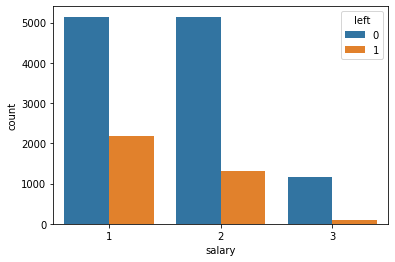

In [23]:
# visualization of employess with left column and salary
sns.countplot(x='salary',hue='left',data=df)
pt.show()

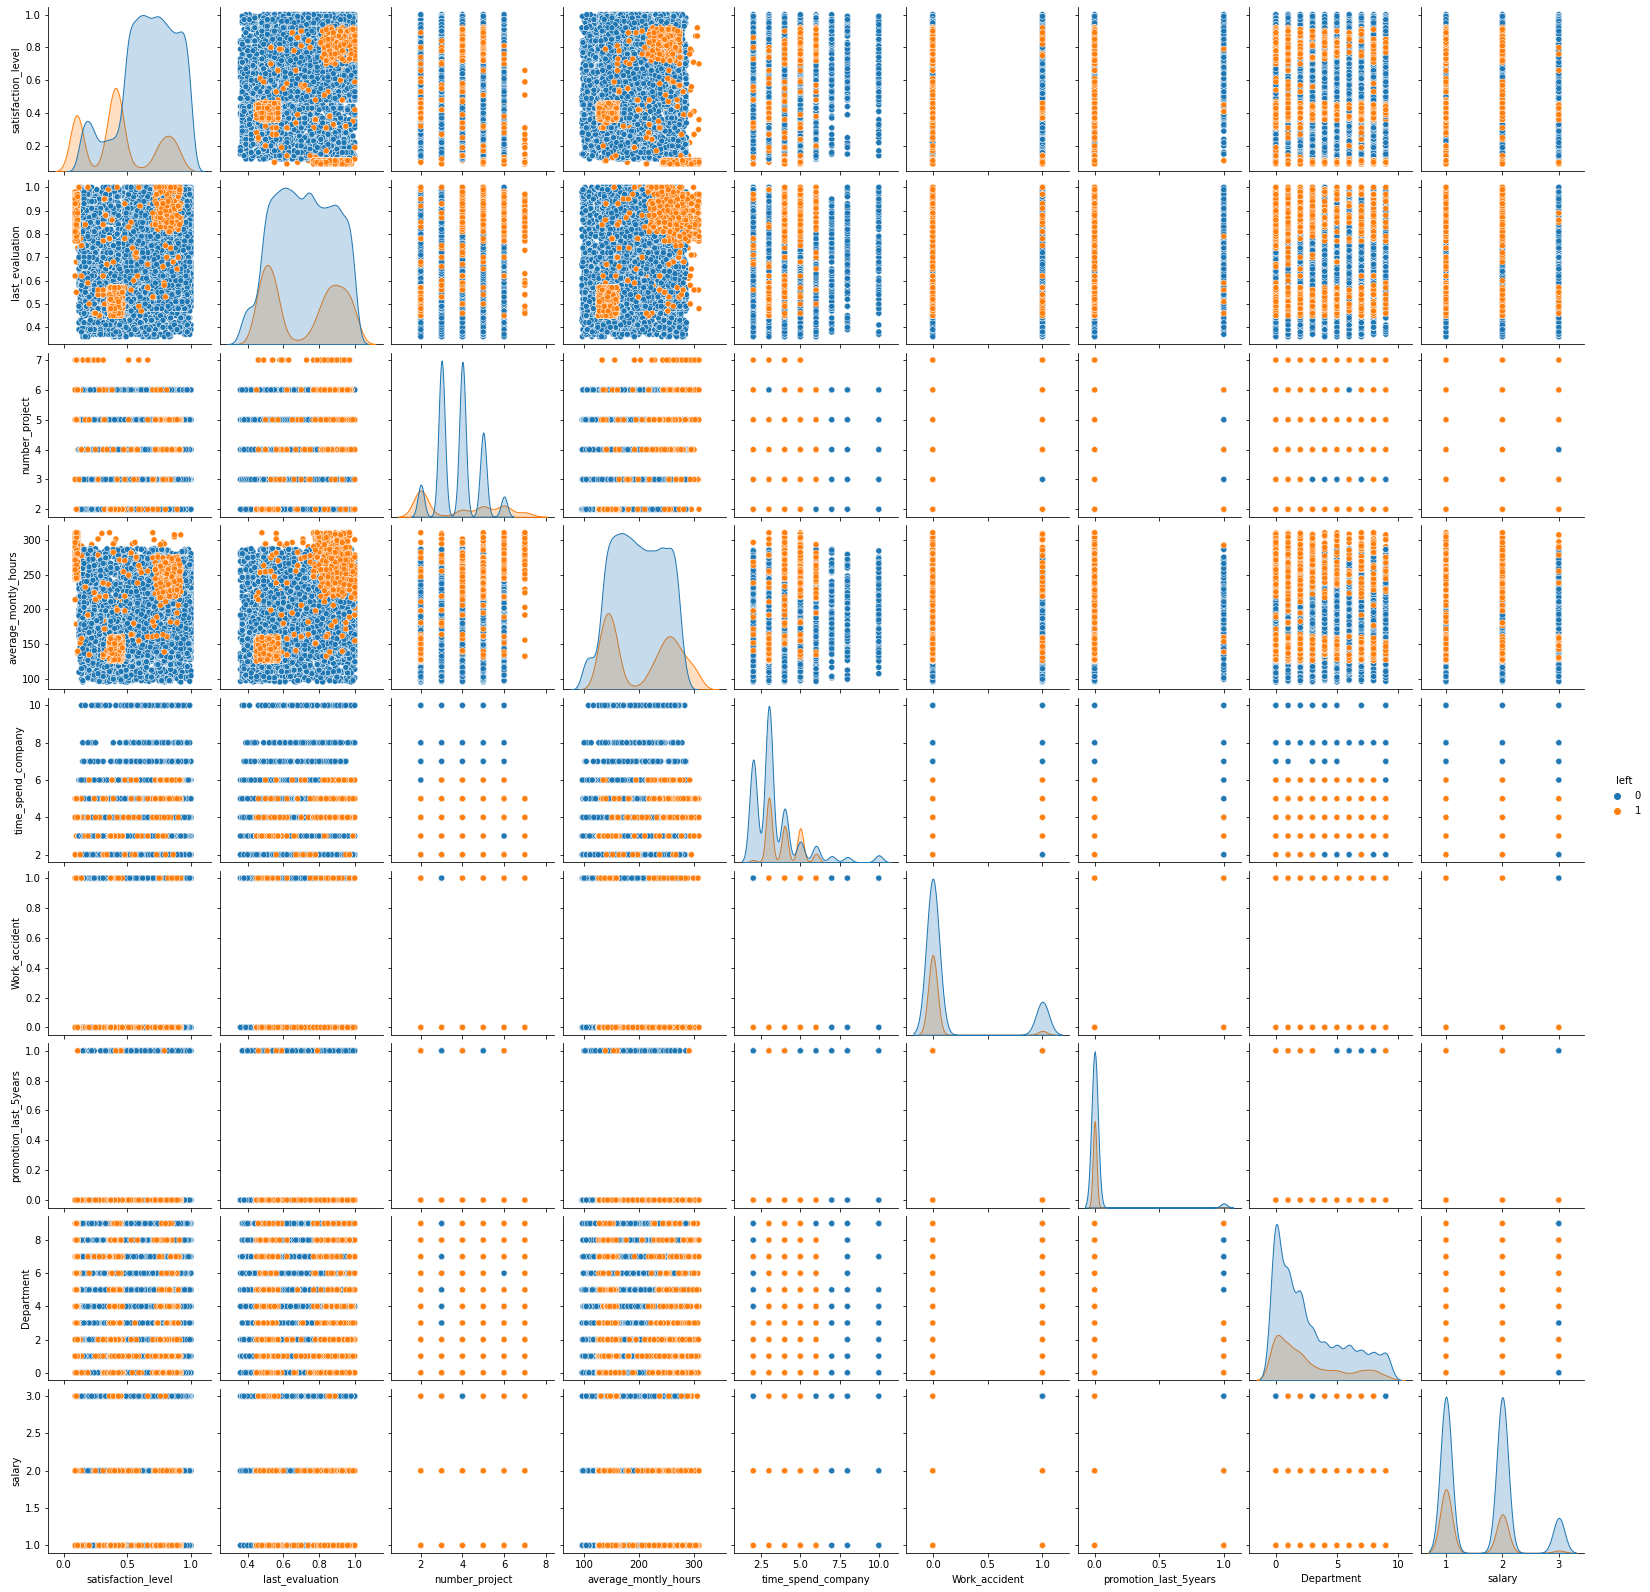

In [24]:
sns.pairplot(data=df,hue='left')
pt.show()

In [32]:
corr=df.corr()
corr.style.background_gradient(cmap="coolwarm")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,0,1,2,3,4,5,6,7,8,9
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022,0.004007,-0.009345,0.009185,0.006373,0.006919,0.005715,0.006615,-0.028649,-0.012841,0.007172
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002,-0.023031,0.013742,0.017104,0.001269,-0.001989,-0.000311,-0.005471,0.002193,-0.009645,0.009662
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803,-0.013388,0.028596,0.000303,0.003287,0.000829,-0.023064,0.009703,0.004189,-0.027356,0.009728
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002242,-0.001718,0.013638,-0.002444,0.006967,-0.005494,-0.008210,-0.001177,0.000524,-0.010783,0.000834
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.048715,0.015150,-0.027991,-0.030111,-0.006053,-0.003919,0.012096,-0.021116,0.003909,-0.022194,0.115436
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247,-0.004955,-0.006070,0.012079,-0.009293,0.001246,0.011367,0.017167,-0.012836,-0.015649,0.011242
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898,0.009923,0.020076,0.010700,-0.010925,-0.011029,-0.000859,-0.046596,0.015201,0.028249,-0.046035
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119,0.012353,-0.035799,-0.035605,-0.038942,-0.037288,0.049253,0.021268,-0.004852,-0.001531,0.128087
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000,-0.035599,-0.018630,-0.029888,-0.010959,-0.007669,0.011599,0.002800,0.012759,0.004599,0.156665
0,0.004007,-0.023031,-0.013388,-0.001718,0.015150,-0.004955,0.009923,0.012353,-0.035599,1.000000,-0.290608,-0.257967,-0.184302,-0.156187,-0.152093,-0.145300,-0.143341,-0.140562,-0.129289


In [35]:
# firts split the feature Columns from the target columns
x=df.drop(columns=['left']).values
y=df['left']

In [36]:
x

array([[0.38, 0.53, 2.  , ..., 0.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 0.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 0.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 0.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 0.  , 0.  ]])

In [38]:
y
# yes=1(leave)
# no=0(won't leave)

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [40]:
x

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.23214788,
        -0.22764728, -0.20939051],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.23214788,
        -0.22764728, -0.20939051],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.23214788,
        -0.22764728, -0.20939051],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.23214788,
        -0.22764728, -0.20939051],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.23214788,
        -0.22764728, -0.20939051],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.23214788,
        -0.22764728, -0.20939051]])

Balancing the data 

In [41]:
y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [42]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_data,y_data=ros.fit_resample(x,y)

In [43]:
from collections import Counter
print("Before balancing:",Counter(y))
print("After Blancing:",Counter(y_data))

Before balancing: Counter({0: 11428, 1: 3571})
After Blancing: Counter({1: 11428, 0: 11428})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


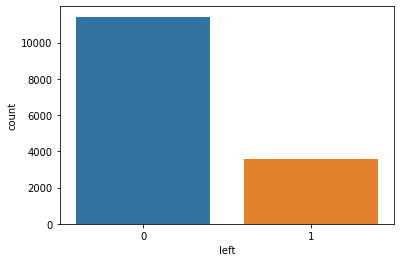

In [44]:
sns.countplot(y)
pt.show()

Modeling 

In [56]:
#divide the data into input and output 
x = df.drop(columns=['left']).values
y = df['left'].values

In [57]:
# splitting the data using train_test_split 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [58]:
# classification algorithm for prediction 
from sklearn.svm import SVC
model1 = SVC()
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2881
           1       1.00      0.09      0.16       869

    accuracy                           0.79      3750
   macro avg       0.89      0.54      0.52      3750
weighted avg       0.83      0.79      0.71      3750



In [60]:
# classification algorithm for prediction (MultinomialNB) 
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred2)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2881
           1       0.00      0.00      0.00       869

    accuracy                           0.77      3750
   macro avg       0.38      0.50      0.43      3750
weighted avg       0.59      0.77      0.67      3750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
y_pred3

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0, 0, 0, ..., 0, 0, 0])

In [63]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred3)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2881
           1       0.58      0.35      0.44       869

    accuracy                           0.79      3750
   macro avg       0.70      0.64      0.65      3750
weighted avg       0.77      0.79      0.77      3750



In [64]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier() 
model4.fit(x_train,y_train) 
y_pred4 = model4.predict(x_test)
y_pred4

array([1, 0, 0, ..., 1, 0, 0])

In [47]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2881
           1       0.89      0.90      0.90       869

    accuracy                           0.95      3750
   macro avg       0.93      0.94      0.93      3750
weighted avg       0.95      0.95      0.95      3750



In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred4)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2881
           1       0.99      0.97      0.98       869

    accuracy                           0.99      3750
   macro avg       0.99      0.99      0.99      3750
weighted avg       0.99      0.99      0.99      3750



Model approach 2 

In [66]:
# Train test split model(dataset)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


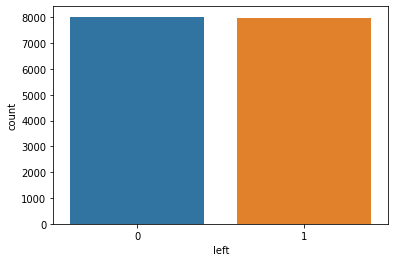

In [67]:
sns.countplot(y_train)

In [68]:
x_test

array([[ 1.39636063, -0.15249603,  0.15978764, ..., -0.23214788,
        -0.22764728, -0.20939051],
       [-1.25826784,  1.01597804,  0.97111292, ..., -0.23214788,
        -0.22764728, -0.20939051],
       [ 0.9137009 ,  0.13962249, -0.65153764, ..., -0.23214788,
        -0.22764728, -0.20939051],
       ...,
       [ 0.59192776,  1.19124915,  0.15978764, ..., -0.23214788,
        -0.22764728, -0.20939051],
       [ 0.83325762,  0.08119878, -0.65153764, ..., -0.23214788,
        -0.22764728, -0.20939051],
       [ 0.87347926,  1.65863878,  0.97111292, ..., -0.23214788,
        -0.22764728, -0.20939051]])

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [71]:
y_pred=knn.predict(x_test)

In [72]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [73]:
from sklearn.metrics import accuracy_score  
ac=accuracy_score(y_test,y_pred)*100

In [74]:
ac

95.0998979145399

## ***Decision Tree***

In [75]:
from sklearn.tree import DecisionTreeClassifier  
decisontree= DecisionTreeClassifier(criterion='entropy', random_state=0)  
decisontree.fit(x_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [76]:
y_prd2=decisontree.predict(x_test)

In [77]:
y_prd2

array([0, 1, 1, ..., 1, 0, 1])

In [78]:
ac2=accuracy_score(y_test,y_prd2)*100
ac2

98.99372903602158

## **Logistic regression**

In [79]:
x1=pd.DataFrame(x)

In [80]:
x1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.80,0.86,5.0,262.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.11,0.88,7.0,272.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14995,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14996,0.37,0.53,2.0,143.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14997,0.11,0.96,6.0,280.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe- testing for multicollinearity 
vif_data = pd.DataFrame()
vif_data["feature"] = x1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x1.values, i)
                          for i in range(len(x1.columns))]

In [82]:
print(vif_data)

    feature        VIF
0         0   1.068156
1         1   1.242396
2         2   1.355295
3         3   1.279283
4         4   1.077142
5         5   1.006192
6         6   1.035220
7         7   1.037195
8         8  10.738865
9         9   7.451383
10       10   6.269385
11       11   3.917144
12       12   3.131293
13       13   3.032939
14       14   2.856066
15       15   2.795529
16       16   2.682789
17       17   2.694858


Generally, a VIF above 5 indicates a high multicollinearity. 
There is no multicollinearity among columns, so we can use Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [84]:
y_pred3=lr.predict(x_test)

In [85]:
y_pred3

array([0, 1, 0, ..., 1, 0, 1])

In [86]:
ac3=accuracy_score(y_test,y_pred3)*100
ac3

76.6078459967916

Votting classifier 

In [87]:
from sklearn.ensemble import VotingClassifier
vote=VotingClassifier(estimators=[('KNN',knn),('Decision tree',decisontree),('Logistic Regression',lr)])
vote.fit(x_train,y_train)
y_pred_vote=vote.predict(x_test)

In [88]:
y_pred_vote

array([0, 1, 1, ..., 1, 0, 1])

In [89]:
ab=vote.score(x_test,y_test)*100
ab

96.84993437363278

K-Nearest Neighbour classifier with accuracy 96%
Decision Tree classifier with accuracy 99.15%
Logistic Rgression classifier with accuracy 76% 